In [1]:
!pip install tensorflow numpy

^C


In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   -----------------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import cv2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [11]:
print("Loading MNIST dataset...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


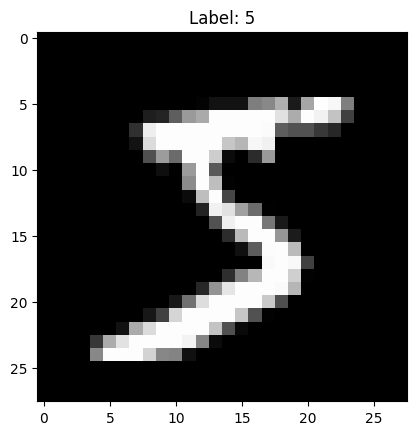

In [12]:
# Normalize to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add channel dimension: (N, 28, 28) -> (N, 28, 28, 1)
train_images = train_images[..., None]
test_images = test_images[..., None]

plt.imshow(train_images[0, :, :, 0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [13]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

print("Compiling the model...")
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

print("Training the model...")
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)


Compiling the model...
Training the model...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.8973 - loss: 0.3249 - val_accuracy: 0.9818 - val_loss: 0.0622
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9679 - loss: 0.1061 - val_accuracy: 0.9875 - val_loss: 0.0449
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9749 - loss: 0.0803 - val_accuracy: 0.9892 - val_loss: 0.0386
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9801 - loss: 0.0644 - val_accuracy: 0.9898 - val_loss: 0.0356
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9827 - loss: 0.0553 - val_accuracy: 0.9912 - val_loss: 0.0358


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_loss, test_acc)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')


313/313 - 3s - 11ms/step - accuracy: 0.9902 - loss: 0.0286
0.028562774881720543 0.9901999831199646

Test accuracy: 99.02%


In [6]:
predictions = model.predict(test_images[:1])
print(predictions)
print(f'\n the predicted digit is {predictions[0].argmax()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[5.7925467e-11 1.8292910e-08 1.4439644e-08 1.9598708e-07 2.7471241e-11
  3.7496704e-11 1.1818129e-13 9.9999917e-01 8.8582108e-10 5.8332756e-07]]

 the predicted digit is 7


(28, 28)


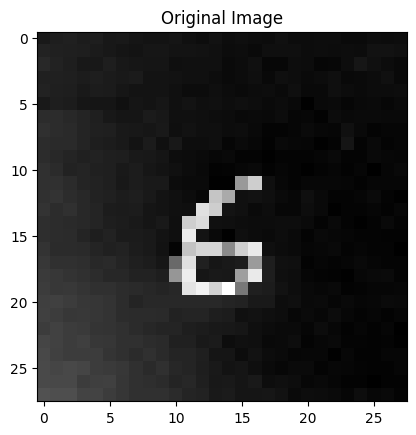

(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step
[[0.06619378 0.02799394 0.245434   0.15322931 0.01707768 0.04733352
  0.35041213 0.00708246 0.05972352 0.02551961]]

 the predicted digit is 6


In [ ]:
# custom image 
file = 'C:\\Users\\Fethulmubin\\Downloads\\six.png'
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = cv2.bitwise_not(image) 
print(image.shape)

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()


image = image.astype('float32') / 255.0
image = image[..., None]  
image = tf.expand_dims(image, axis=0) 
print(image.shape)  #(1, 28, 28, 1) 1 batch size, 28 height, 28 width, 1 channel(layer of information)
prediction = model.predict(image)
print(prediction)
print(f'\n the predicted digit is {prediction[0].argmax()}')
